In [1]:
#####################################################################################################
# Created by Irmela ZENTNER for openMETIS (EURATOM METIS project) : fragility comutation by regression method
#
# Date 23/06/2024
# EDF R&D
#
# cite as: Zentner, I. et al. (2016). “Fragility analysis methods: Review of existing approaches and
# application.” Nuclear Engineerinf Design, 323(5).
#
######################################################################################################


In [2]:
import numpy as np
#import statsmodels.api as sm
import scipy.stats
import matplotlib.pyplot as plt
import sys, os
wd = os.getcwd()
sys.path.insert(0,wd)

In [3]:
from fragility import fragility_regression, compute_frag

### Load and plot data

In [4]:
dataset = np.genfromtxt('IM_EDP_pair_floor0.txt')

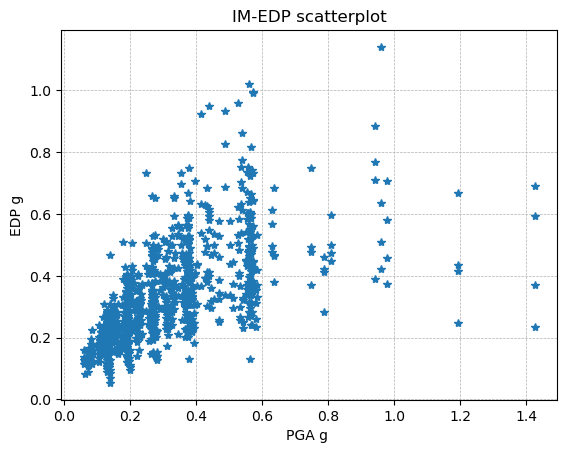

In [5]:
# plot the relation between the IMs and EDPs

plt.figure()
plt.plot(dataset[0], dataset[1], '*' )

plt.title(f'IM-EDP scatterplot')
plt.xlabel('PGA g ',)
plt.ylabel('EDP g')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Added both major and minor grids with custom styling

### Compute the fragility by regression in logspace

Coefficients:  [[0.57763205]]
Intercept:  [-0.430552]
Mean squared error: 0.10
sigma: 0.32
Coefficient of determination: 0.54
the regression fragility parameters Am, beta are
[[0.87025399]] [[0.55183741]]


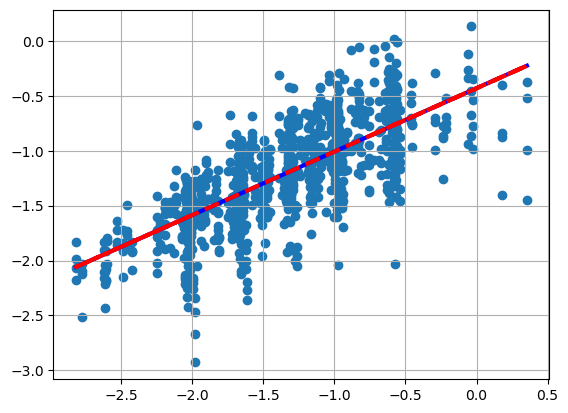

In [6]:
# Threshold value
threshold = 0.6
am, beta = fragility_regression(dataset[0], dataset[1],  threshold )

print('the regression fragility parameters Am, beta are')
print(am,beta)

### Plot fragility curve

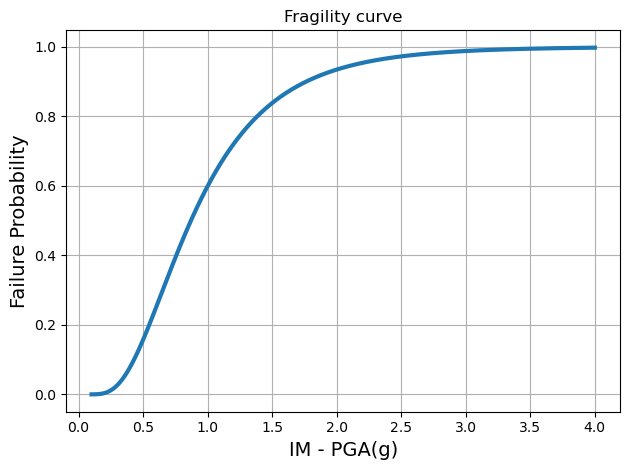

In [7]:
x = np.linspace(0.1, 4.0, 1000)
frag = compute_frag(x, am, beta)
plt.plot(x, frag[0], linewidth = 3, label=f'fragility by regression')

plt.xlabel('IM - PGA(g)', fontsize =14)
plt.ylabel('Failure Probability', fontsize =14)
plt.title('Fragility curve')
plt.grid(True)
#plt.legend()  # Add legend

plt.tight_layout()
plt.show()
